In [65]:
import cudf as pd_cf
from cudf.utils.dtypes import datetime
import matplotlib.pyplot as plt
import os

In [66]:
data_ans = pd_cf.read_csv("data/answer_metadata.csv")
#AnswerId             DateAnswered Confidence  GroupId  QuizId SchemeOfWorkId [1508917 rows x 6 columns]
data_ans = data_ans[['AnswerId','DateAnswered']]
#AnswerId             DateAnswered  [1508917 rows x 2 columns]


data_ques = pd_cf.read_csv("data/question_metadata.csv")
#QuestionId         SubjectId   [948 rows x 2 columns]


data_stu = pd_cf.read_csv("data/student_metadata.csv")
#UserId  Gender              DateOfBirth PremiumPupil   [6148 rows x 4 columns]
data_stu = data_stu[['UserId','Gender','DateOfBirth']]
#UserId  Gender              DateOfBirth    [6148 rows x 3 columns]



data_relation = pd_cf.read_csv("data/train_task_4.csv")
#QuestionId  UserId  AnswerId  IsCorrect  CorrectAnswer  AnswerValue    [1307347 rows x 6 columns]

In [67]:
def age_extraction(data):
    age_sum = 0
    now = datetime.datetime.now()
    age_list = []
    data = data.to_pandas()
    for x in data['DateOfBirth']:
        if x !=  None:
            x.strip()
            x.strip("\n")
            year, month = int(x.split('-')[0]), int(x.split('-')[1])
            age =  (now.year-year)- (now.month-month)/12.
            age_list.append(age)
            age_sum += age
        else:
            age_list.append(x)
    data['age'] = age_list
    mean_age = age_sum / len(age_list)
    data['age'].fillna(value = mean_age,inplace = True)
    data['age'] = (data['age'] -  data['age'].min()) / data['age'].max()
    return data

In [68]:
data_stu = age_extraction(data_stu)

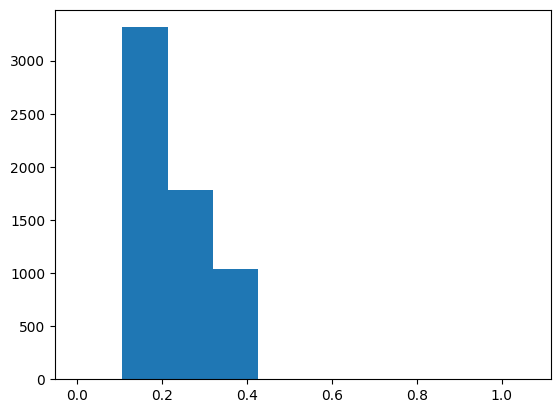

In [69]:
plt.hist(data_stu['age'])
plt.plot()
plt.show()

In [70]:
data_relation = pd_cf.merge(data_relation,data_ques)
print(data_relation.columns)

Index(['QuestionId', 'UserId', 'AnswerId', 'IsCorrect', 'CorrectAnswer',
       'AnswerValue', 'SubjectId'],
      dtype='object')


In [71]:
data_stu =pd_cf.from_pandas(data_stu)
data_re = pd_cf.merge(data_relation,data_stu,on='UserId', how='left')
print(data_re)

         QuestionId  UserId  AnswerId  IsCorrect  CorrectAnswer  AnswerValue  \
0               472    4298    568974          0              4            2   
1               868     282   1410897          1              3            3   
2               931     463    712822          0              4            3   
3               335    2301   1396763          1              4            4   
4               766    3371    538485          0              2            1   
...             ...     ...       ...        ...            ...          ...   
1307342         116     521   1032464          1              2            2   
1307343         395    4012    878670          1              1            1   
1307344         642    3460    821975          0              2            3   
1307345         867    4387    979477          1              1            1   
1307346         862     673    150538          0              2            4   

                 SubjectId  Gender     

In [74]:
data_stu.to_csv("./train_data/data_stu.csv")
data_relation.to_csv("./train_data/data_train.csv")